# 0. 

기본 모듈

In [ ]:
!pip install holiday
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 7.2 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [1]:
import matplotlib.pyplot as plt


from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot
import holidays

from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import urllib.request
import requests
import json
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [58]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,632 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = (26, 16)


# 1. 데이터 불러오기

In [3]:
main = pd.read_csv('/content/drive/MyDrive/프로젝트 마켓컬리/데이터/raw 2/대파 Final.csv') 

In [4]:
DY = main.loc[:,['date','대파_거래량(kg)','대파_가격(원/kg)']]

In [5]:
DY['date'] = pd.to_datetime(DY['date'])
DY.set_index('date',drop=True,inplace=True)

In [6]:
DY

,대파_거래량(kg),대파_가격(원/kg)
date,,
2016-01-01,0.0,0
2016-01-02,92334.0,1704
2016-01-03,0.0,0
2016-01-04,994328.1,1716
2016-01-05,787716.0,1715
...,...,...
2020-11-01,0.0,0
2020-11-02,686406.5,2412
2020-11-03,711666.4,2334


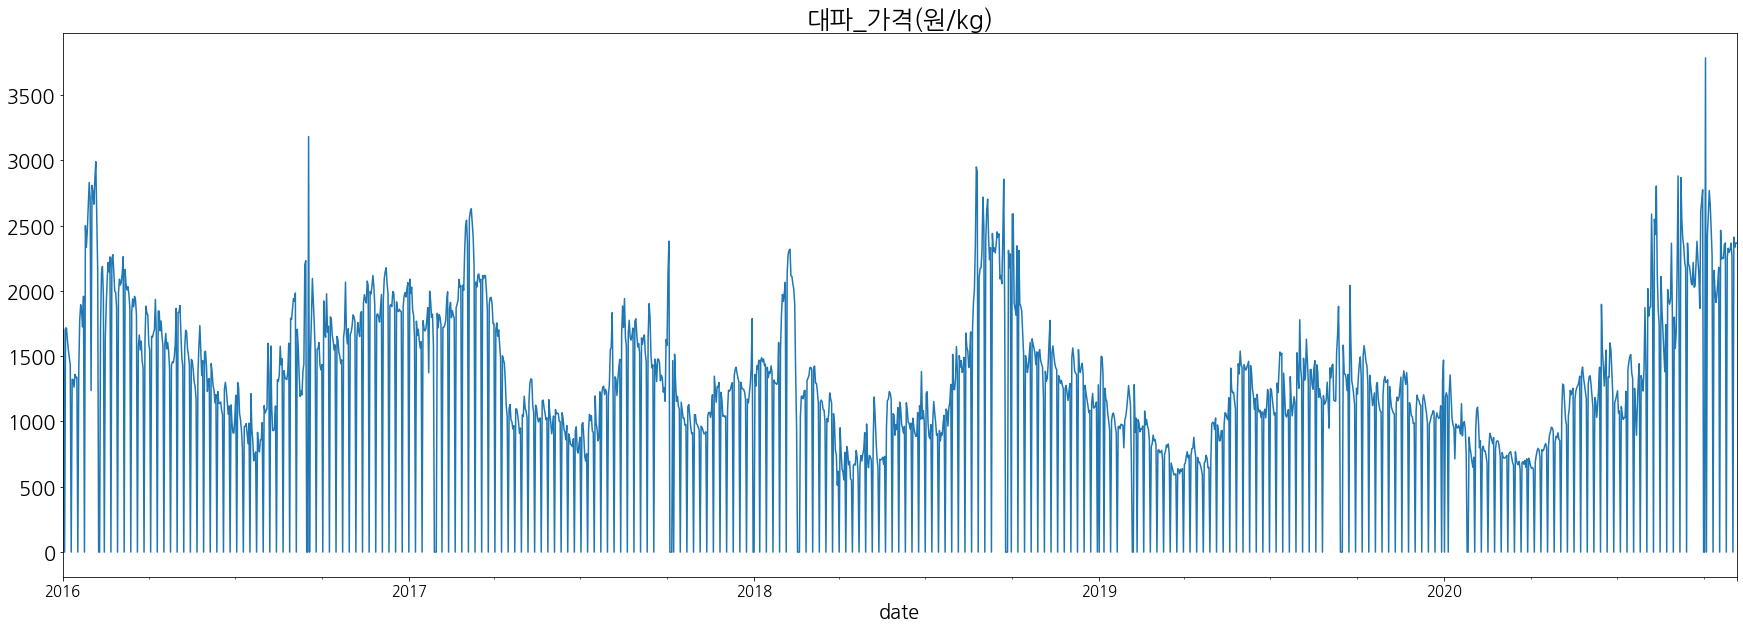

In [7]:
import seaborn as sns
plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = (26, 16)


plt.title('대파_가격(원/kg)', fontsize=25)
plt.xlabel('기간', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 20)
DY['대파_가격(원/kg)'].plot(figsize=(30,10))

In [8]:
main_df = DY.reset_index()

main_df = pd.DataFrame() # 빈데이터 프레임 생성 
main_df['ds'] = DY.reset_index(drop=False)['date'] # 시간 부분 넣기 
main_df['y'] = DY.reset_index(drop=False)['대파_가격(원/kg)'] # 가격

main_train_df = main_df[:1733]
main_test_df = main_df[1733:]

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(main_train_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp21qsoalj/_n71hqen.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21qsoalj/3bu268b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1254', 'data', 'file=/tmp/tmp21qsoalj/_n71hqen.json', 'init=/tmp/tmp21qsoalj/3bu268b9.json', 'output', 'file=/tmp/tmp21qsoalj/prophet_modelnx6rq_af/prophet_model-20221014150115.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:01:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
main_df

,ds,y
0,2016-01-01,0
1,2016-01-02,1704
2,2016-01-03,0
3,2016-01-04,1716
4,2016-01-05,1715
...,...,...
1728,2020-09-24,2380
1729,2020-09-25,2239
1730,2020-09-26,2126
1731,2020-09-27,1866


In [9]:
main_test_df.shape

(38, 2)

In [10]:
future_data = prophet.make_future_dataframe(periods = 38, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1766,2020-11-01,224.236909,-158.081011,608.788477
1767,2020-11-02,1689.065319,1239.575436,2127.951951
1768,2020-11-03,1697.882548,1243.229320,2133.982132
1769,2020-11-04,1681.162974,1208.522721,2121.825879
1770,2020-11-05,1695.839296,1216.697435,2176.272266


- ds = 날짜 데이터(시간데이터)
- yhat = 예측 값
- yhat_lower = 예측 데이터 최소값
- yhat_upper = 예측 데이터 최대값

Text(0.5, 1.0, '값 비교')

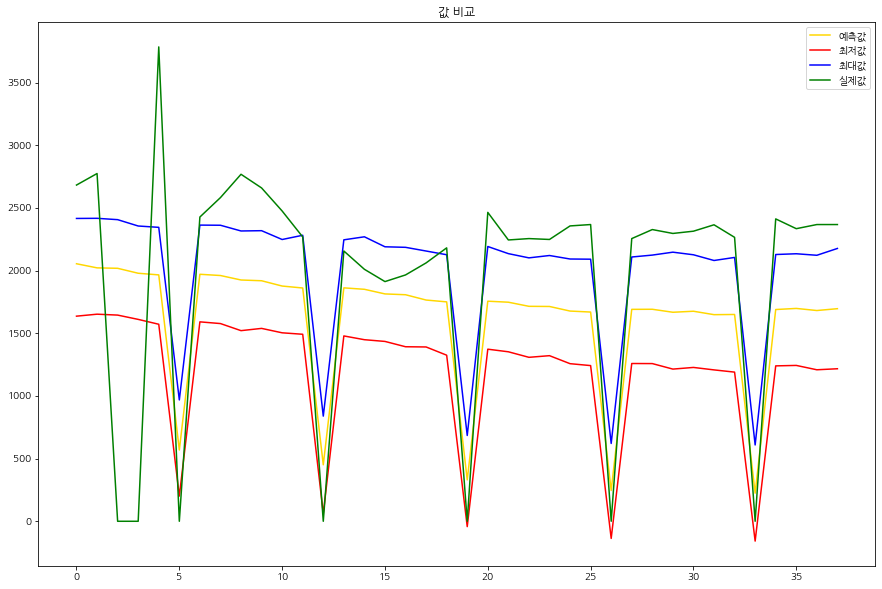

In [11]:
plt.figure(figsize=(15, 10))

# 마지막 38일의 예측 데이터 (2020-09-28 ~ 2020-11-04)
pred_fbprophet_y = forecast_data.yhat.values[-38:]

# 실제 38일의 데이터 (2020-09-28 ~ 2020-11-04)
test_y = main_test_df.y.values

# 마지막 38일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-38:]
# 마지막 38일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-38:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [12]:
y_pred = forecast_data.yhat.values[-38:]

In [13]:
import math

In [14]:
rmse = math.sqrt(mean_squared_error(test_y,y_pred))
r2 = r2_score(test_y, y_pred)

print(rmse)
print(r2)

766.7379391506588
0.37638219790453775


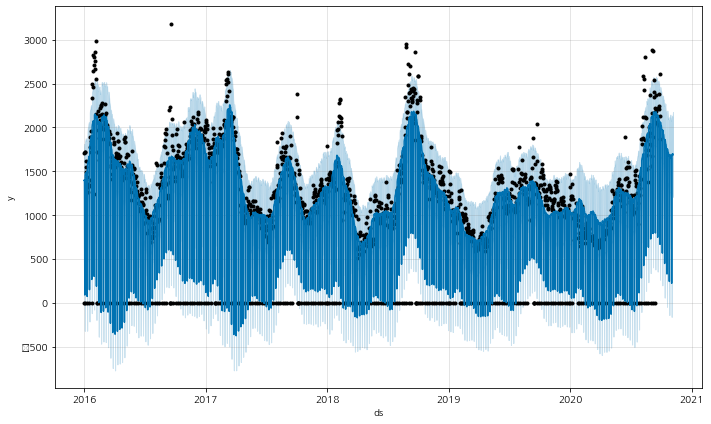

In [16]:
fig1 = prophet.plot(forecast_data)
# 까만점은 실제데이터, 파란선은 예측값, 하늘색은 신뢰도 85퍼센트의 예측 구간

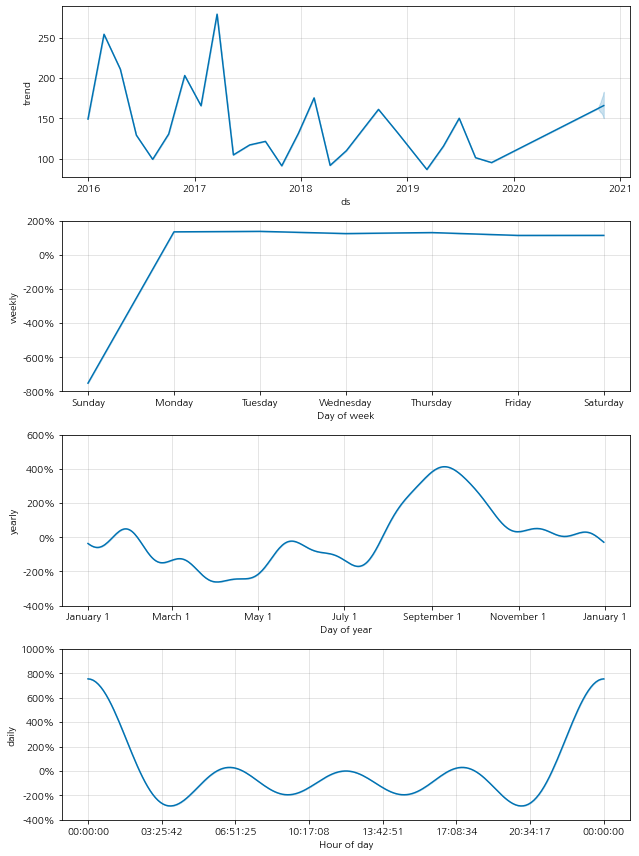

In [18]:
fig = prophet.plot_components(forecast_data)

In [19]:

result = pd.DataFrame()
result = forecast_data[['yhat_lower','yhat_upper','yhat']]
temp_df = pd.DataFrame()
temp_df = DY[1733:]
result['real'] = temp_df['대파_가격(원/kg)'].reset_index(drop=True)
temp_df.reset_index(inplace=True)
result['time'] = temp_df['date']
result.dropna(inplace=True)
result.set_index('time',drop=True,inplace=True)
result

,yhat_lower,yhat_upper,yhat,real
time,,,,
2020-09-29,1002.714162,1813.632560,1396.069043,2682.0
2020-09-30,1027.770616,1782.579578,1404.849401,2774.0
2020-10-01,-317.382258,477.979753,90.932524,0.0
2020-10-02,1058.559246,1840.336528,1455.736069,0.0
2020-10-03,1093.956854,1859.887688,1471.669082,3784.0
2020-10-04,1071.714660,1876.243399,1463.961171,0.0
2020-10-05,1098.815031,1861.961792,1487.330781,2427.0
2020-10-06,1088.513099,1848.796901,1476.379466,2582.0
2020-10-07,1112.734569,1872.412238,1494.259380,2768.0


In [20]:
# 비교하여 그래프 그려주는 함수 제작 

def vsplot(df):
  plt.plot(df.index,df['yhat'], label='forecast data', color='blue')
  plt.fill_between(df.index,df['yhat_upper'],df['yhat_lower'],color='skyblue',label='80% confidence interval')
  plt.scatter(df.index,df['real'], label='Real data ', color='black')
  plt.legend()
  plt.xlabel('date')
  plt.ylabel('대파_가격(원/kg)')
  plt.show()

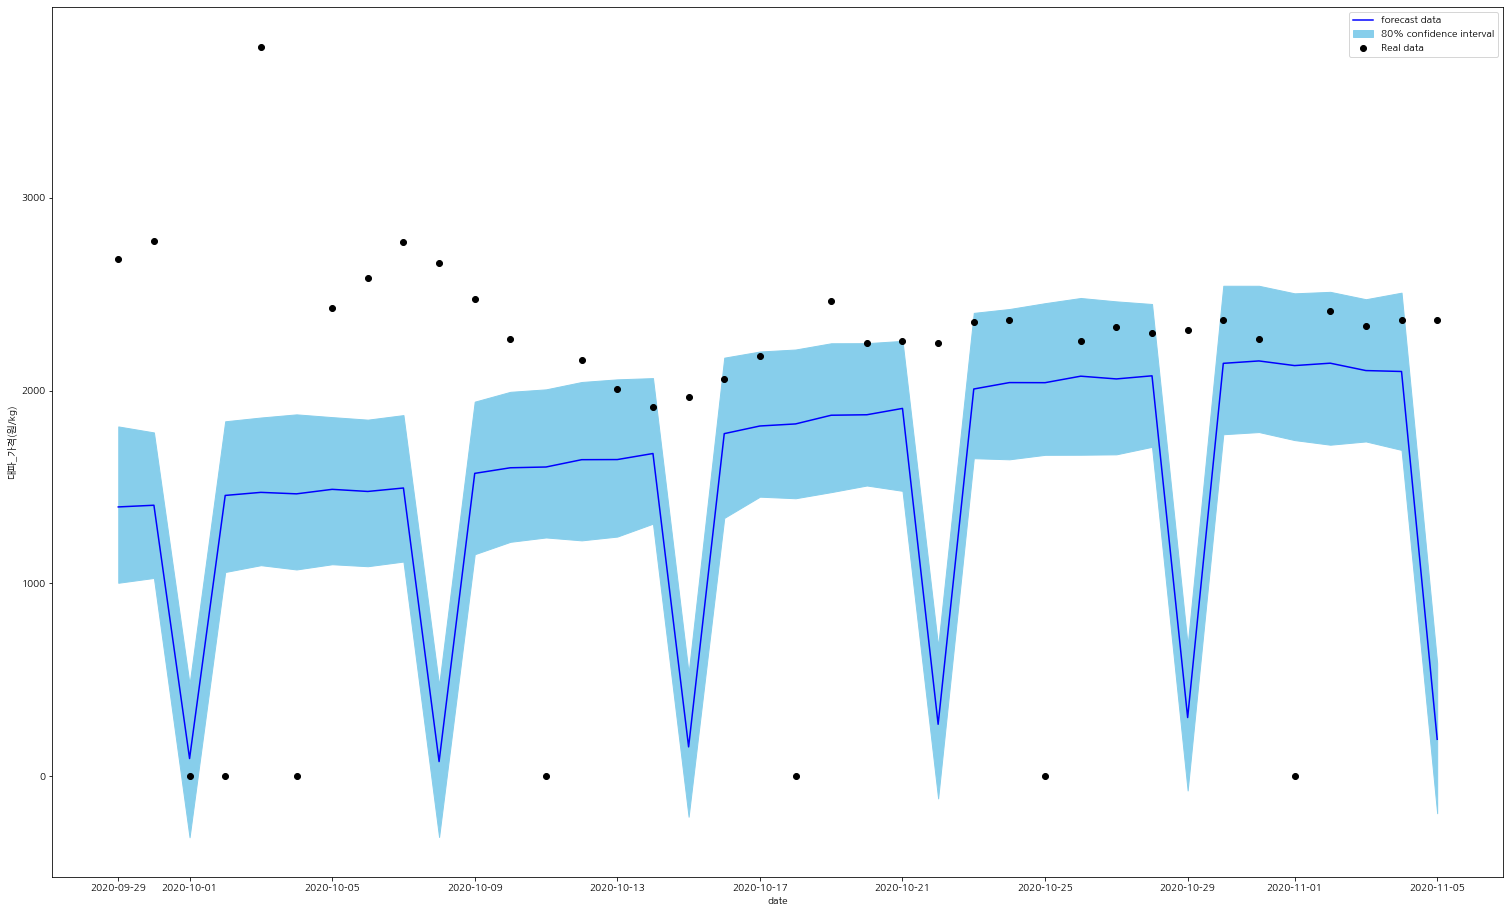

In [21]:
vsplot(result)